In [1]:
import dhlab as dh
import dhlab.api.dhlab_api as api
import pandas as pd

In [140]:
tot = api.totals(500000)

In [163]:
def coll_periods(doc=None, fy=1900, ty = 2020, period = 10, word=None, before=10, after=10, corpus_size=5000):
    colls_raw = []
    for year in range(fy, ty, period):
        try:
            coll = api.urn_collocation(
                urns = list(dh.Corpus(doctype=doc, fulltext = word, from_year= year, to_year = year + period, limit = corpus_size).frame.urn),
                word = word,
                before = before, 
                after = after,         
            )
            coll[str(year)]= coll['counts']
            #colls_raw.append(coll[[str(year)]])
            colls_raw.append(coll[[str(year)]])
        except:
            print(f"feil med {year}")

    colls = pd.concat(colls_raw, axis=1)
    return colls

In [125]:
class Colls():
    def __init__(self, doctype=None, from_year=1900, to_year=2024, period=10, word=None, before=10, after=10, corpus_size=5000):
        self.colls = coll_periods(doc=doctype, fy=from_year, ty=to_year, period=period, word=word, corpus_size=corpus_size)
        self.relative = self.colls / self.colls.sum()
        
    def make_assoc(self, comparison):
        """combine colls table with frequency list from comparison assumed to be a pd.Series"""
        colls_raw = []
        comp_rel = comparison / comparison.sum()
        for year in self.colls:
            nomin = self.colls[year] / self.colls[year].sum()
            column = pd.Series(nomin / comp_rel, name=year)
            colls_raw.append(column)
        self.assoc = pd.concat(colls_raw, axis=1)

    def show_data(self, attribute, subset=None, sortby=None, head=50):
        df = getattr(self, attribute)
        if subset is None:
            data = df
        else:
            data = df.loc[[x for x in subset if x in df.index]]
            
        if not sortby:
            sortby = data.columns[0]
        elif sortby not in data.columns and isinstance(sortby, int):
            # assume sortby is an integer pointing to column number
            sortby = data.columns[sortby]
        
        sorted_data = data.sort_values(by=sortby, ascending=False)
        if head is None:
            return sorted_data
        else:
            return sorted_data.head(head)

    def show_assoc(self, sortby=None, subset=None, head=50):
        return self.show_data('assoc', subset, sortby, head)

    def show_coll_counts(self, sortby=None, subset=None, head=50):
        return self.show_data('colls', subset, sortby, head)

    def show_coll_relative(self, sortby=None, subset=None, head=50, multiplier=100):
        """multiplier for percent or ppm (parts per million)"""
        return self.show_data('relative', subset, sortby, head) * multiplier


In [161]:
olje = Colls(doctype="digavis", from_year=1970, to_year=2020, period=15, word="oljeutvinning", corpus_size=5000)

1970
1985
2000
2015


In [251]:
pollution = Colls(doctype="digavis", from_year=1970, to_year=2020, period=15, word="forurensing", corpus_size=5000)

In [258]:
pollution2 = Colls(doctype="digavis", from_year=1970, to_year=2020, period=15, word="forurensning", corpus_size=5000)

In [245]:
pure_oil = Colls(doctype="digavis", from_year=1970, to_year=2020, period=15, word="olje", corpus_size=5000)

feil med 1970
feil med 1985
feil med 2000


In [248]:
pure_oil_def = Colls(doctype="digavis", from_year=1970, to_year=2020, period=15, word="oljen", corpus_size=5000)

In [164]:
klimagass = Colls(doctype="digavis", from_year=1970, to_year=2020, period=15, word="klimagasser", corpus_size=5000)

feil med 1970


In [166]:
olje.make_assoc(comparison=tot.freq)

In [165]:
klimagass.make_assoc(comparison=tot.freq)

In [252]:
pollution.make_assoc(comparison=tot.freq)

In [259]:
pollution2.make_assoc(comparison=tot.freq)

In [249]:
pure_oil_def.make_assoc(comparison=tot.freq)

In [167]:
olje.show_assoc(sortby=1, head=10)

,1970,1985,2000,2015
dokumentasjonssenter,NaN,5635.687881,NaN,NaN
bergverksdrift,3413.380000,5269.498509,33.468427,19.007288
opplevelses-,NaN,4946.755484,NaN,NaN
dykkernes,NaN,3606.777381,NaN,NaN
emiratene,NaN,3088.883976,NaN,NaN
Lillibeths,NaN,3082.492503,NaN,NaN
kraftforsyning,1286.627184,2604.429082,NaN,26.813818
produksjonsindeks,165.818840,2555.366762,NaN,NaN
rørtransport,341.103440,2453.083039,NaN,179.495437
Heidrun-feltet,NaN,2436.826554,137.359592,NaN


In [143]:
olje.show_coll_relative(sortby=2, subset="klimaendring klimaendringer klimakrise klimakrisen klima forurensing forurensning".split(), multiplier=1000000, head=None)

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
klima,44.352454,25.222801,64.977258,NaN,NaN,16.733601,35.902346,146.225553,347.787480,451.520913
forurensning,325.251331,151.336808,43.318172,143.678161,284.180613,368.139224,83.772140,82.251874,22.199201,154.467681
forurensing,147.841514,58.853203,32.488629,574.712644,78.939059,NaN,35.902346,63.973679,29.598934,59.410646
klimaendring,NaN,NaN,NaN,NaN,NaN,16.733601,NaN,NaN,NaN,NaN
klimaendringer,NaN,NaN,NaN,NaN,NaN,NaN,35.902346,82.251874,236.791476,71.292776
klimakrise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.646388
klimakrisen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.278194,7.399734,11.882129


# Plot params

In [182]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

# Relative frequencies

In [263]:
words = """klimaendringer
miljøvern klima klimaet klimakrisen klimagasser
klimagassutslipp forurensing""".split()

w2 = """oljerikdom NBIM oljefondet Oljefondet oljeinntektene""".split()

pollution_words = "sot svovel co2 Co2 CO2 nitrogener NOx NOX nox".split()
pollution_words2 = "sot svovel co2 Co2 CO2".split()

<Axes: >

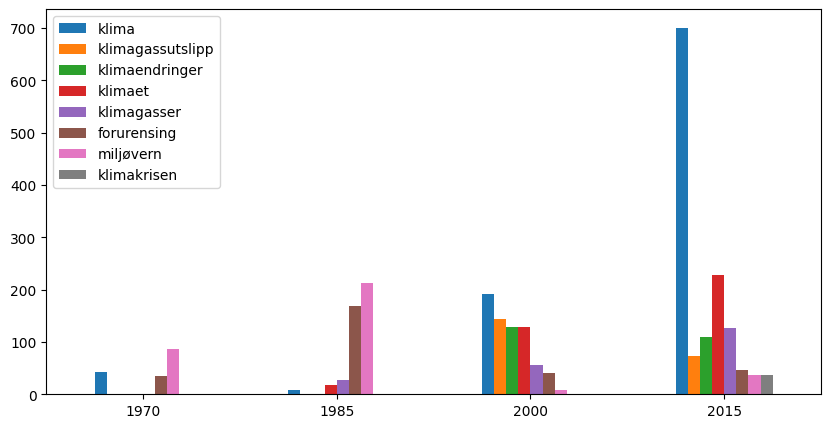

In [216]:
(olje
 .show_coll_relative(
     sortby=2, 
     multiplier=1000000,
     subset=words, 
     head=None)
 .transpose()
 .plot(kind='bar', figsize=(10,5), rot=0)
)

<Axes: >

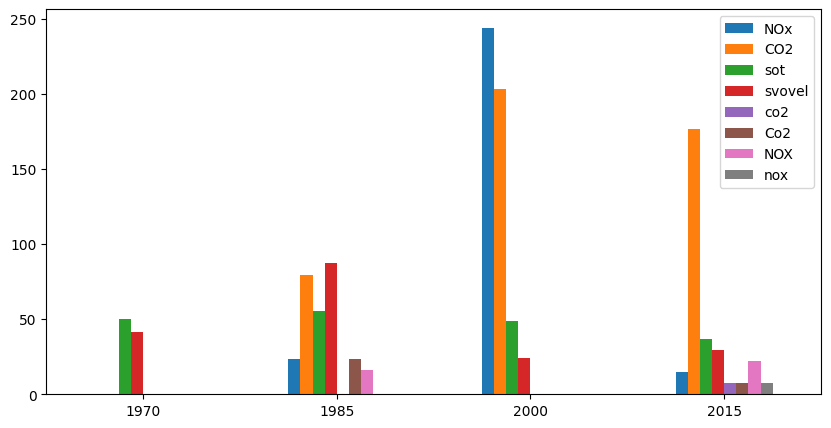

In [255]:
(pollution
 .show_coll_relative(
     sortby=2, 
     multiplier=1000000,
     subset=pollution_words, 
     head=None)
 .transpose()
 .plot(kind='bar', figsize=(10,5), rot=0)
)

<Axes: >

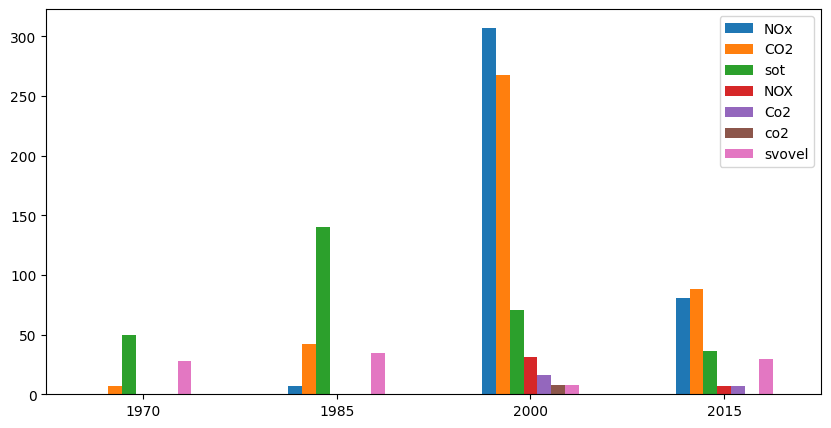

In [260]:
(pollution2
 .show_coll_relative(
     sortby=2, 
     multiplier=1000000,
     subset=pollution_words, 
     head=None)
 .transpose()
 .plot(kind='bar', figsize=(10,5), rot=0)
)

<Axes: >

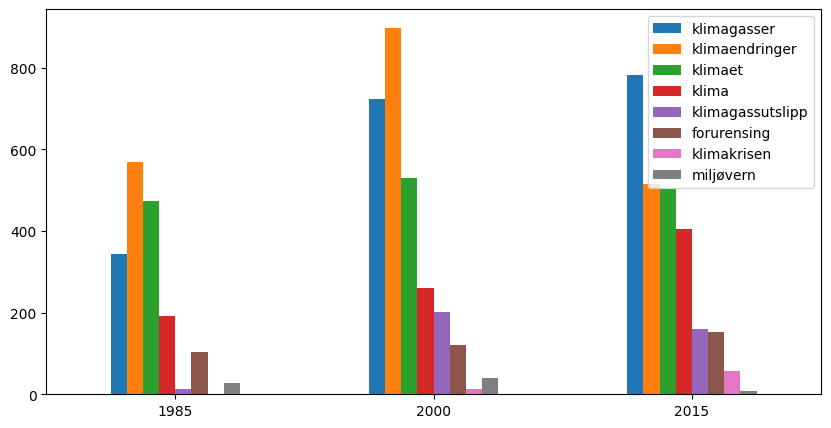

In [217]:
(klimagass
 .show_coll_relative(
     sortby=2, 
     multiplier=1000000,
     subset= words,
     head=None)
   
 .transpose()
 .plot(kind='bar', figsize=(10,5), rot=0)
)

# Assocs

<Axes: >

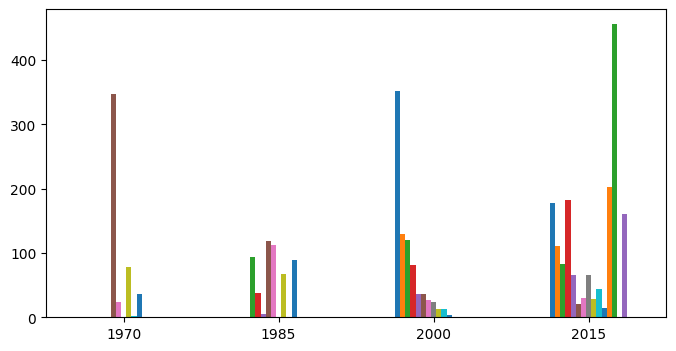

In [225]:
(olje
 .show_assoc(sortby=2, 
             subset=words+w2+['oljeinntekter'],
             head=None)
 .transpose()
 .plot(kind='bar', figsize=(8,4), rot=0, legend=False)
)

<Axes: >

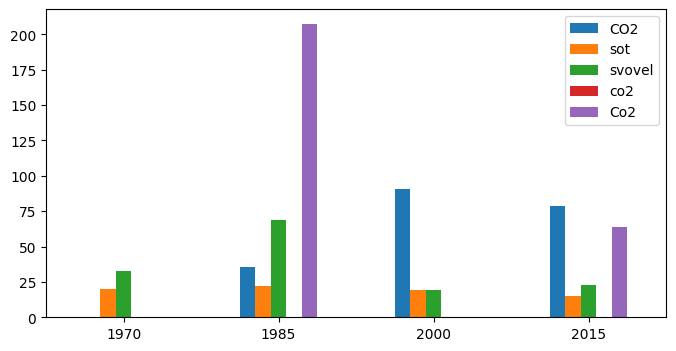

In [264]:
(pollution
 .show_assoc(sortby=2, 
             subset=pollution_words2,
             head=None)
 .transpose()
 .plot(kind='bar', figsize=(8,4), rot=0)
)

<Axes: >

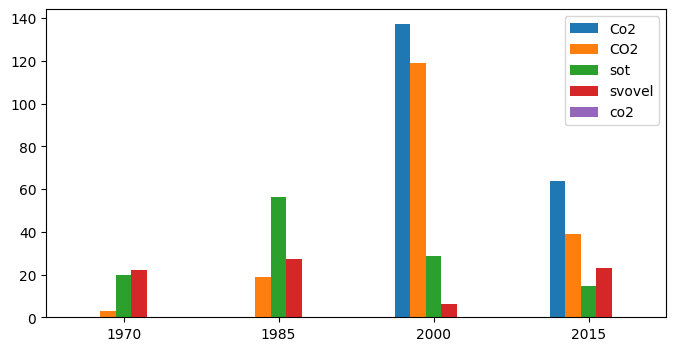

In [265]:
(pollution2
 .show_assoc(sortby=2, 
             subset=pollution_words2,
             head=None)
 .transpose()
 .plot(kind='bar', figsize=(8,4), rot=0)
)

<Axes: >

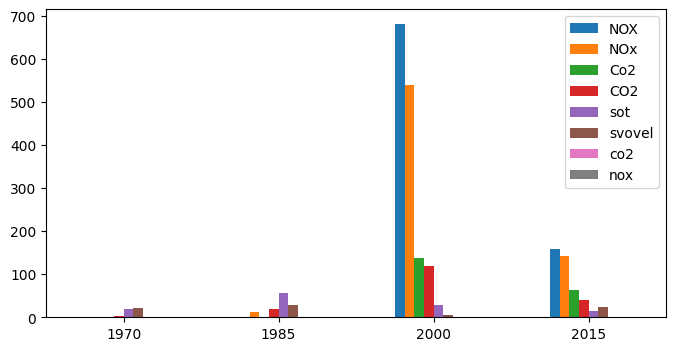

In [261]:
(pollution2
 .show_assoc(sortby=2, 
             subset=pollution_words,
             head=None)
 .transpose()
 .plot(kind='bar', figsize=(8,4), rot=0)
)

<Axes: >

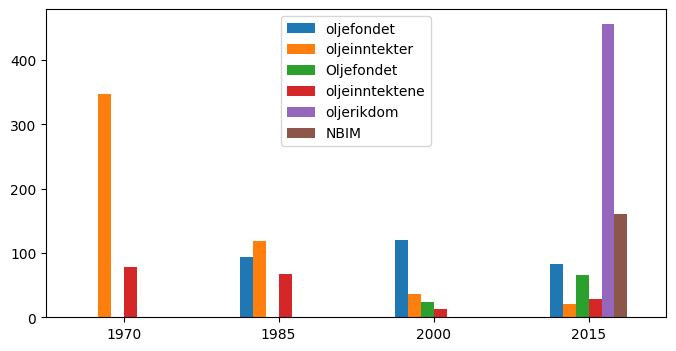

In [243]:
(olje
 .show_assoc(sortby=2, 
             subset=w2+['oljeinntekter'],
             head=None)
 .transpose()
 .plot(kind='bar', figsize=(8,4), rot=0)
)

<Axes: >

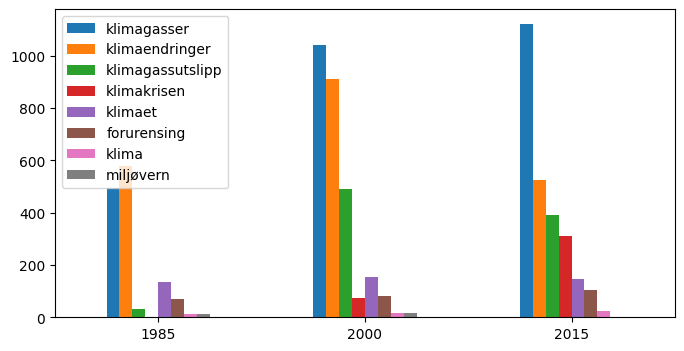

In [220]:
(klimagass
 .show_assoc(sortby=2, 
            subset= words,
              head=None)
 .transpose()
 .plot(kind='bar', figsize=(8,4), rot=0)
)

In [244]:
(olje
 .show_assoc(sortby=None, 
             subset=words+w2+['oljeinntekter', 'forurensning'],
             head=None)
 .fillna(0)
 #.sort_index()
 .style
 .format(precision=0)
 .background_gradient(axis=1)
 #.transpose()
 #.plot(kind='bar', figsize=(8,4), rot=0)
)

,1970,1985,2000,2015
oljeinntekter,347,119,36,20
oljeinntektene,79,68,12,28
forurensning,47,53,6,34
miljøvern,36,89,3,15
forurensing,23,113,27,30
klima,3,1,12,44
klimaendringer,0,0,130,111
klimaet,0,5,37,65
klimakrisen,0,0,0,203
klimagasser,0,38,81,183


In [267]:
(pollution2
 .show_assoc(sortby=None, 
             subset=["svovel","CO2", "NOX"],#pollution_words,
             head=None)
 .fillna(0)
 #.sort_index()
 .style
 .format(precision=0)
 .background_gradient(axis=1)
 #.transpose()
 #.plot(kind='bar', figsize=(8,4), rot=0)
)

,1970,1985,2000,2015
svovel,22,27,6,23
CO2,3,19,119,39
NOX,0,0,681,158


In [250]:
(pure_oil_def
 .show_assoc(sortby=None, 
             subset=words+w2+['oljeinntekter', 'forurensning'],
             head=None)
 .fillna(0)
 #.sort_index()
 .style
 .format(precision=0)
 .background_gradient(axis=1)
 #.transpose()
 #.plot(kind='bar', figsize=(8,4), rot=0)
)

,1970,1985,2000,2015
oljeinntektene,215,188,41,66
oljeinntekter,55,107,105,16
forurensning,22,20,10,7
forurensing,8,18,9,5
miljøvern,5,0,3,0
klimaet,2,6,23,29
klimaendringer,0,0,14,51
klima,0,0,1,4
klimakrisen,0,0,38,121
klimagasser,0,0,19,21
